In [1]:

import argparse
import glob
import itertools
import json
import os
import sys
import time

import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

from astropy.time import Time
from astropy.io import ascii

from astropy.visualization import time_support
time_support()
from astropy.visualization import quantity_support
quantity_support()

#from scipy.interpolate import make_interp_spline as spline

## set plot style
plt.style.use("seaborn-colorblind")
mpl.rcParams.update({"axes.grid" : True})
plt.style.context(("seaborn-colorblind",));
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

In [6]:
os.getcwd()

'/mnt/c/Users/Tyler/Documents/GitHub/nmma_fitter/msiStats'

In [28]:
with open('ztf_observation_log.json','r') as f:
    data = json.load(f)['Entries']
data= pd.DataFrame(data)
df = data.drop(data.index[0]).reset_index(drop=True)

df.loc[:, 'Date'] = (df.Date.map(lambda x: x[0])).astype(np.datetime64)
df['datetime'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df[df['Date'] > '2021-05-31'].reset_index(drop=True)
#df['Date'] = pd.to_datetime(df['Date']).astype(np.datetime64)
display(df.head())


,Name,IssueType,Date,Weather,Observed,Removed,Notes,DataToIPAC,IssueCuts,datetime
0,Entry,instrument,2021-08-04,None,False,False,Thermal runaway,False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-04
1,Entry,instrument,2021-08-06,None,False,False,"Dome never opened, telescope not initialized",False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-06
2,Entry,maintenance,2021-08-10,None,True,False,P48 observing floor clean-up/look over on cryo...,True,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-10
3,Entry,maintenance,2021-08-25,None,True,False,Corrector cleaning,True,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-25
4,Entry,instrument,2021-09-28,None,False,False,Shutter problems; Corrector cleaning,False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-09-28


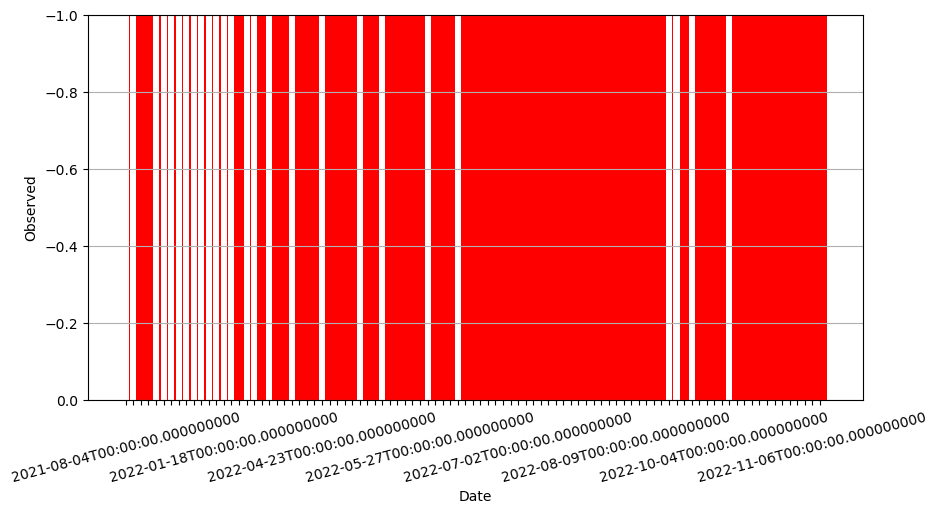

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
plot = sns.barplot(data=df, x='Date', y=df['Observed']-1, 
            color='white',ax=ax)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 13 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.axvspan(df.index[0], df.index[-1], facecolor='red', alpha=1,zorder=0)
ax.set_ylim(0, -1)
plt.xticks(rotation=15)
plt.show();

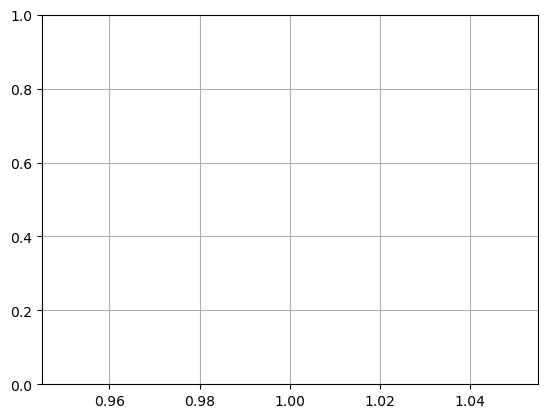

In [27]:
plt.axvspan(1, np.nan)